## Case Study EDA: Pulsar star prediction

The following notebook performs EDA on a given dataset about stars in an attempt to classify them as pulsar stars or otherwise.

Importing required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defining a color palette for binary hued plots:

In [2]:
biCol = ['maroon', 'thistle']

Reading the data from the .csv file into a pandas dataframe:

In [3]:
df = pd.read_csv('pulsar_data_train.csv')

Displaying the first and last five rows of the dataframe:

In [4]:
df

Mean of the integrated profile  \
0                           121.156250   
1                            76.968750   
2                           130.585938   
3                           156.398438   
4                            84.804688   
...                                ...   
12523                       124.312500   
12524                       115.617188   
12525                       116.031250   
12526                       135.664062   
12527                       120.726562   

        Standard deviation of the integrated profile  \
0                                          48.372971   
1                                          36.175557   
2                                          53.229534   
3                                          48.865942   
4                                          36.117659   
...                                              ...   
12523                                      53.179053   
12524                                      46.784600   
12525                                      43.213846   
12526                                      49.933749   
12527                                      50.472256   

        Excess kurtosis of the integrated profile  \
0                                        0.375485   
1                                        0.712898   
2                                        0.133408   
3                                       -0.215989   
4                                        0.825013   
...                                           ...   
12523                                   -0.012418   
12524                                    0.218177   
12525                                    0.663456   
12526                                   -0.089940   
12527                                    0.346178   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                                -0.013165                   3.168896   
1                                 3.388719                   2.399666   
2                                -0.297242                   2.743311   
3                                -0.171294                  17.471572   
4                                 3.274125                   2.790134   
...                                    ...                        ...   
12523                            -0.556021                   7.186455   
12524                             0.226757                   6.140468   
12525                             0.433088                   0.785117   
12526                            -0.226726                   3.859532   
12527                             0.184797                   0.769231   

        Standard deviation of the DM-SNR curve  \
0                                    18.399367   
1                                    17.570997   
2                                    22.362553   
3                                          NaN   
4                                    20.618009   
...                                        ...   
12523                                29.308266   
12524                                      NaN   
12525                                11.628149   
12526                                21.501505   
12527                                11.792603   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                                  7.449874                      65.159298   
1                                  9.414652                     102.722975   
2                                  8.508364                      74.031324   
3                                  2.958066                       7.197842   
4                                  8.405008                      76.291128   
...                                     ...                            ...   
12523                              4.531382                      21.725143   
12524                              5.732201                      34.357283   
12525        

Displaying the general information of the dataframe:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


Displaying the basic descriptive statistics of the dataframe:

In [6]:
df.describe()

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                10793.000000   
mean                                     0.478548   
std                                      1.064708   
min                                     -1.738021   
25%                                      0.024652   
50%                                      0.223678   
75%                                      0.473125   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             11350.000000   
mean                                 26.351318   
std                                  19.610842   
min                                   7.370432   
25%                                  14.404353   
50%                                  18.412402   
75%                                  28.337418   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   11903.000000   
mean                               8.333489                     105.525779   
std                                4.535783                     107.399585   
min                               -3.139270                      -1.976976   
25%                                5.803063                      35.199899   
50%                                8.451097                      83.126301   
75%                               10.727927                     139.997850   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [7]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [8]:
df[' Excess kurtosis of the integrated profile'].fillna(df[' Excess kurtosis of the integrated profile'].median(), inplace = True)

In [9]:
df[' Standard deviation of the DM-SNR curve'].fillna(df[' Standard deviation of the DM-SNR curve'].median(), inplace = True)

In [10]:
df[' Skewness of the DM-SNR curve'].fillna(df[' Skewness of the DM-SNR curve'].median(), inplace = True)

In [11]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

The count of data points for each outcome is checked to understand if the dataset is balanced or not.

In [12]:
df.describe()

Mean of the integrated profile  \
count                     12528.000000   
mean                        111.041841   
std                          25.672828   
min                           5.812500   
25%                         100.871094   
50%                         115.183594   
75%                         127.109375   
max                         189.734375   

        Standard deviation of the integrated profile  \
count                                   12528.000000   
mean                                       46.521437   
std                                         6.801077   
min                                        24.772042   
25%                                        42.362222   
50%                                        46.931022   
75%                                        50.979103   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                12528.000000   
mean                                     0.443251   
std                                      0.992144   
min                                     -1.738021   
25%                                      0.057820   
50%                                      0.223678   
75%                                      0.421239   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         12528.000000               12528.000000   
mean                              1.778431                  12.674758   
std                               6.208450                  29.613230   
min                              -1.791886                   0.213211   
25%                              -0.188142                   1.910535   
50%                               0.203317                   2.792642   
75%                               0.932374                   5.413253   
max                              68.101622                 222.421405   

        Standard deviation of the DM-SNR curve  \
count                             12528.000000   
mean                                 25.604827   
std                                  18.809291   
min                                   7.370432   
25%                                  14.761144   
50%                                  18.412402   
75%                                  26.473142   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          12528.000000                   12528.000000   
mean                               8.333489                     104.408308   
std                                4.535783                     104.799639   
min                               -3.139270                      -1.976976   
25%                                5.803063                      38.128424   
50%                                8.451097                      83.126301   
75%                               10.727927                     135.774973   
max                               34.539844                    1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [13]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

<AxesSubplot:xlabel='target_class', ylabel='count'>

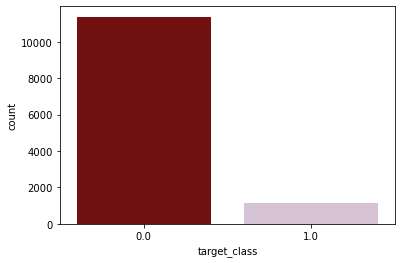

In [14]:
sns.countplot(x = 'target_class', data = df, palette = biCol)

The pairplot is displayed to check for visual cues of correlated variables/features.

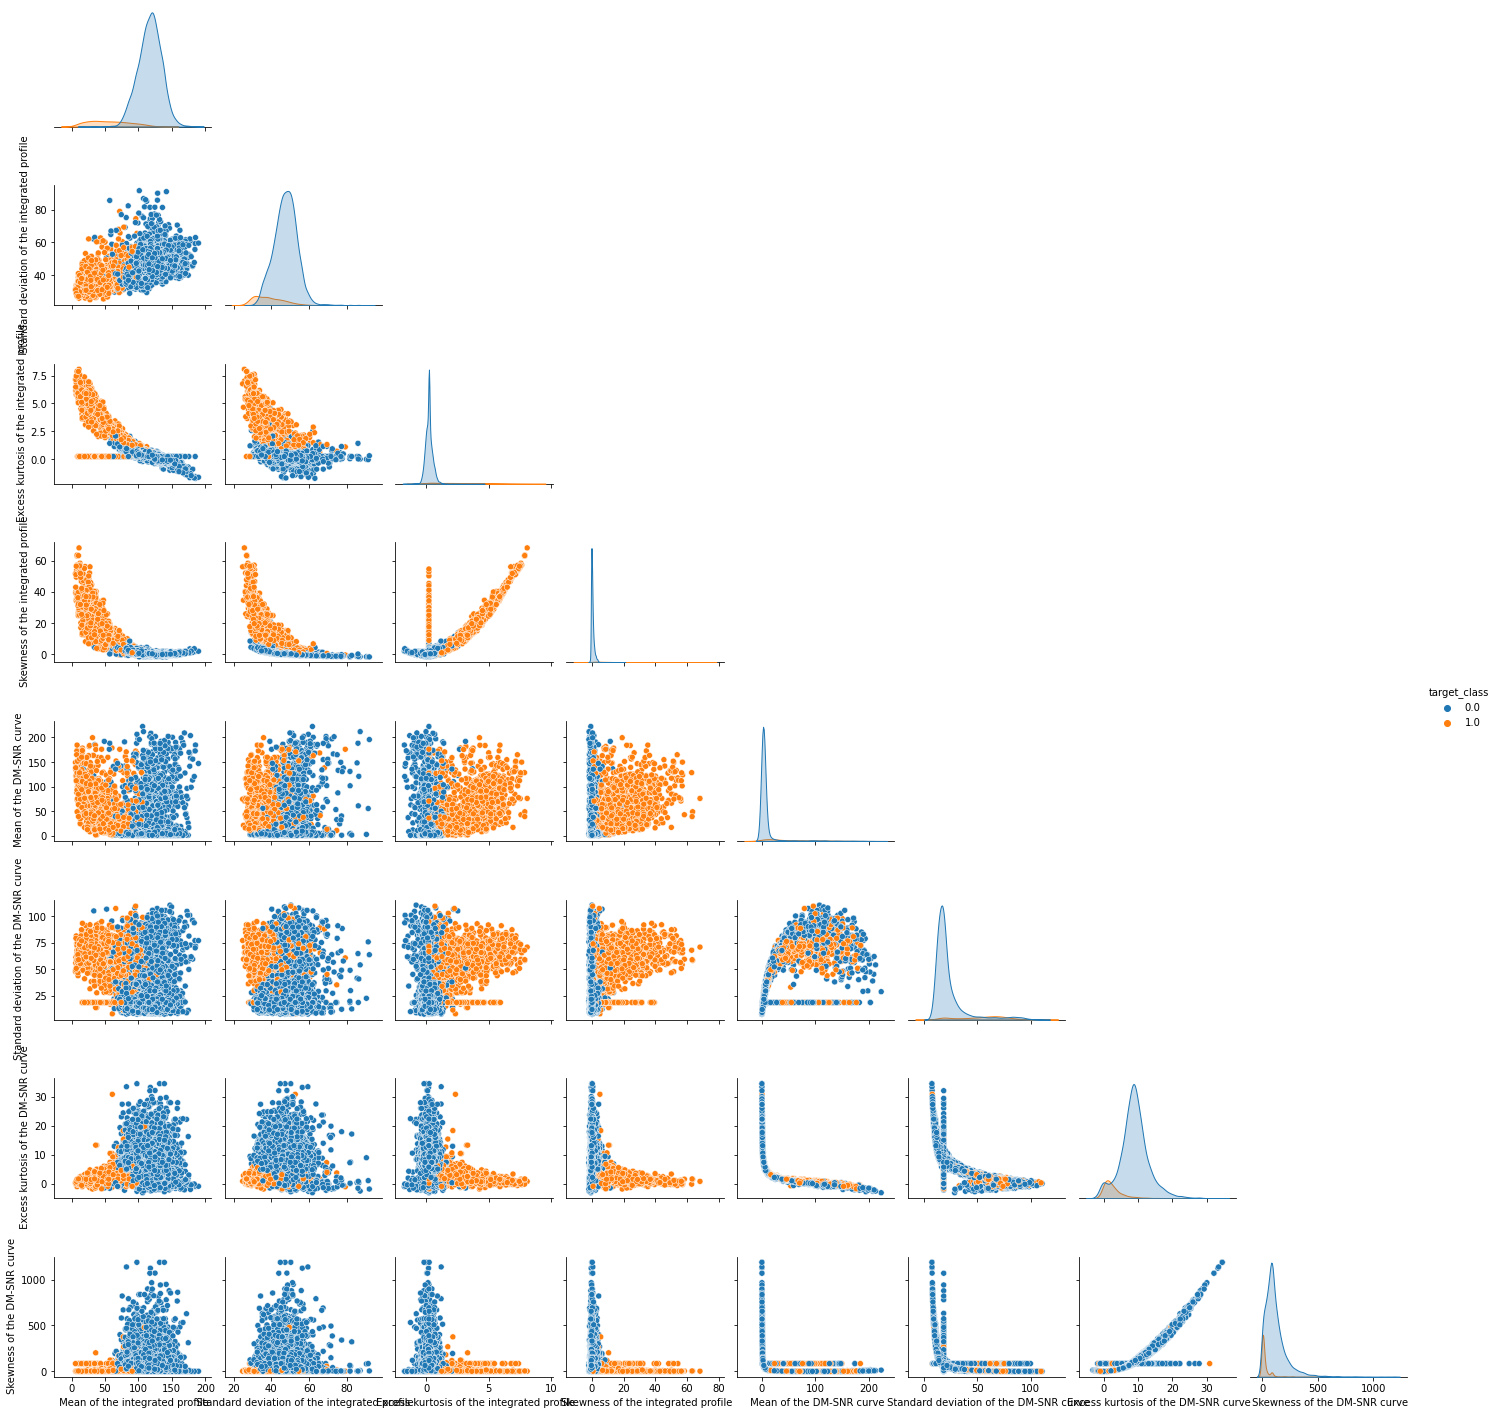

In [15]:
sns.pairplot(data = df, hue = 'target_class', corner = True)

The correlation heatmap is displayed to get a quantified sense of the same.

<AxesSubplot:>

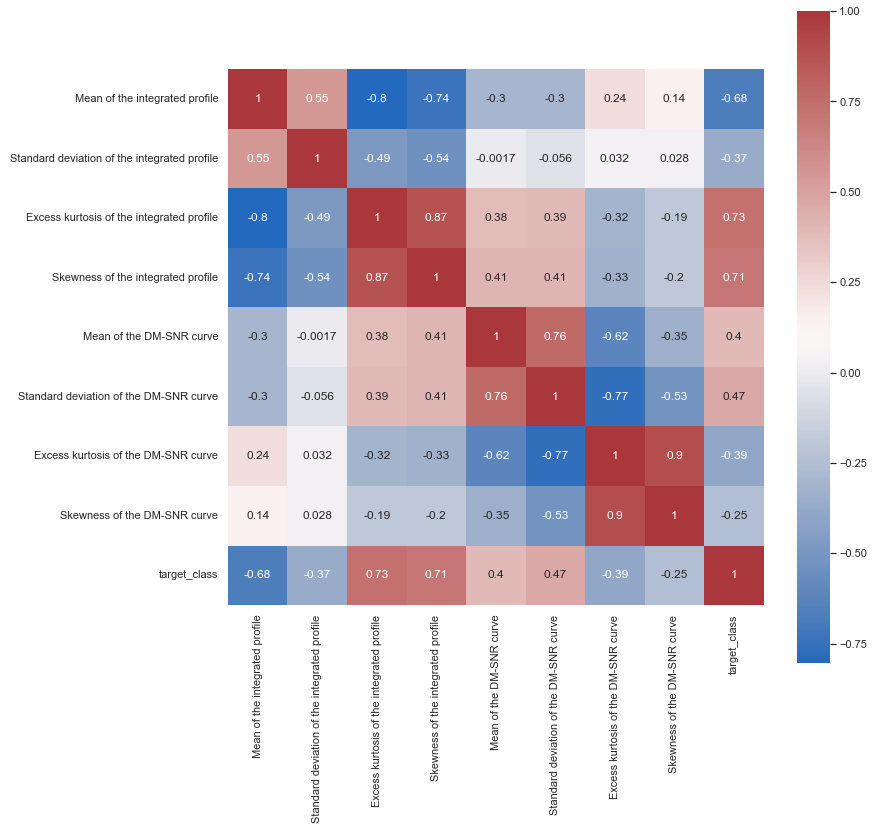

In [16]:
sns.set(rc = {'figure.figsize': (12, 12)})

corr = df.corr()
sns.heatmap(data = corr, square = True, annot = True, cbar = True, cmap = 'vlag')

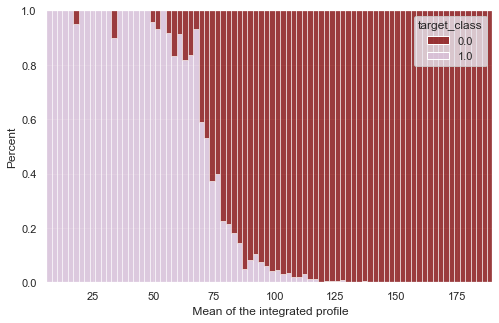

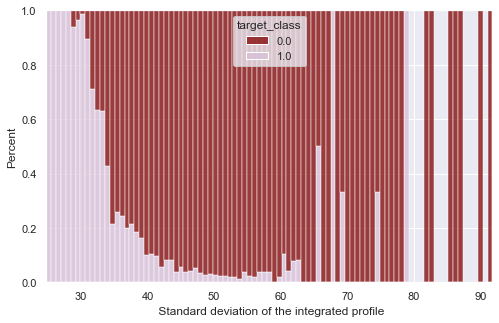

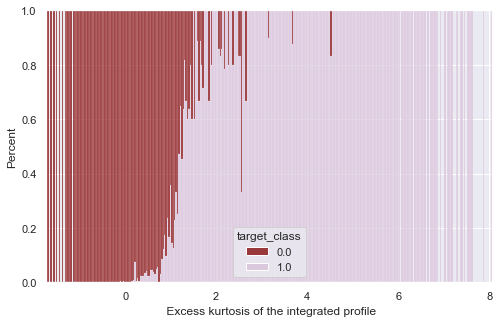

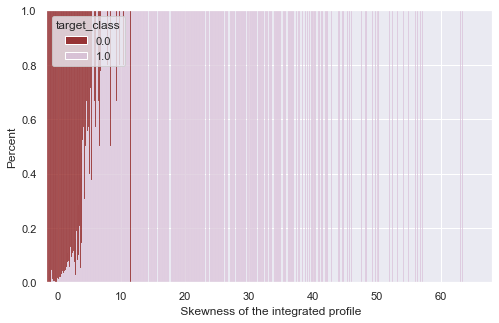

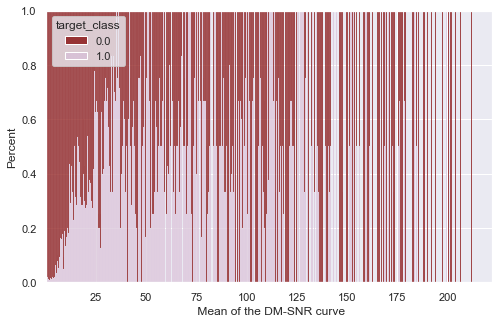

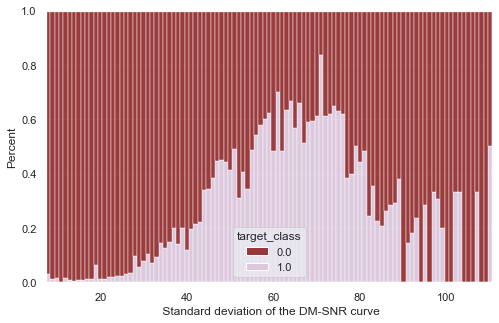

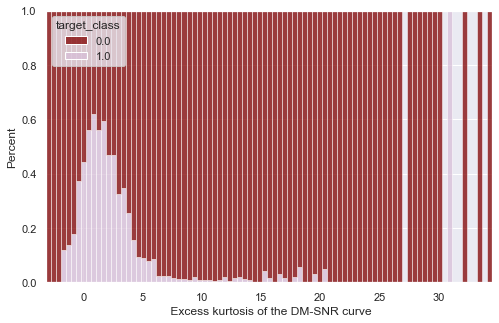

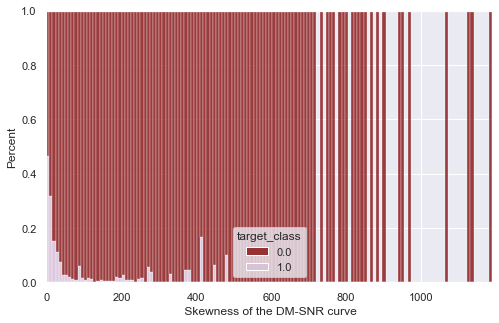

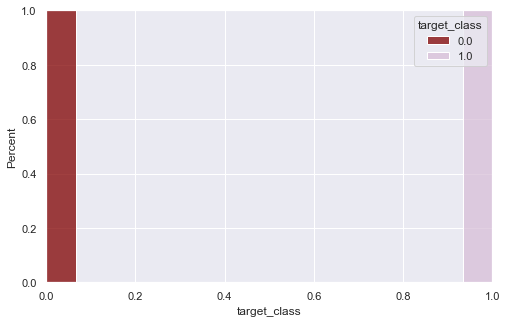

In [17]:
for column in df.columns:
    sns.set(rc = {'figure.figsize': (8, 5)})
    sns.histplot(df, x = column, hue = 'target_class', multiple = 'fill', stat = 'percent', palette = biCol)
    plt.show()

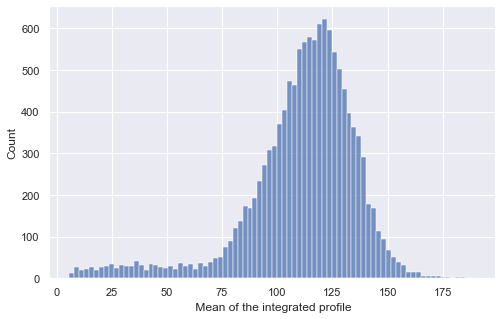

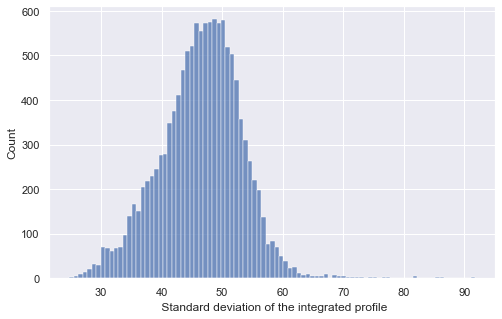

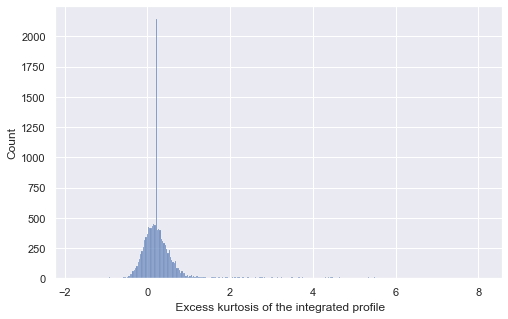

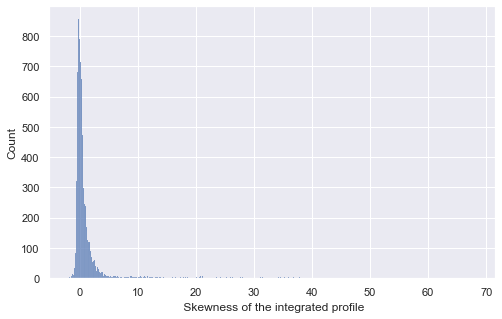

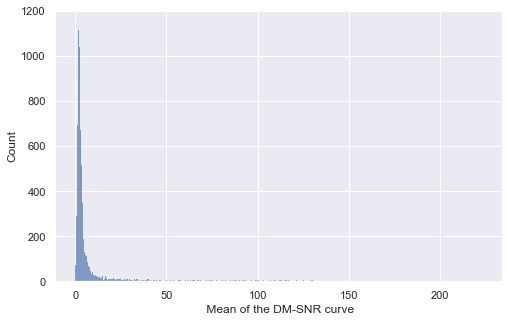

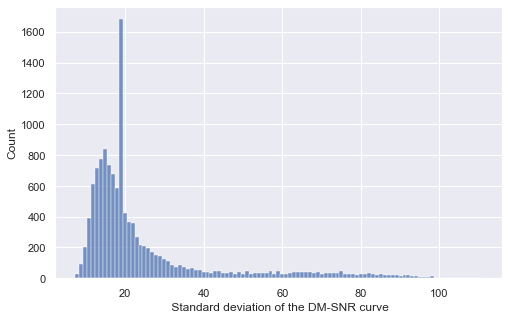

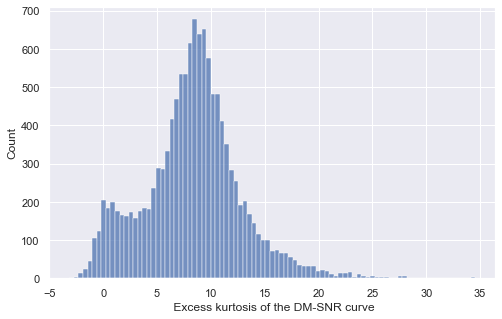

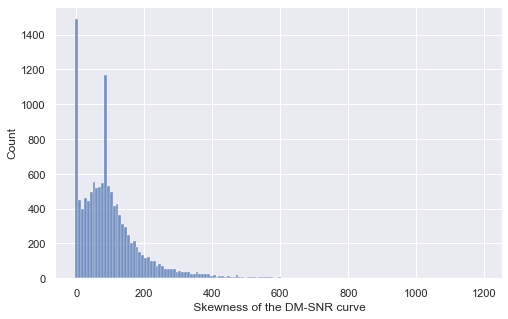

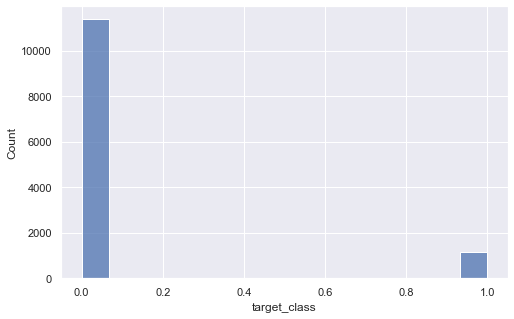

In [18]:
for column in df.columns:
    sns.set(rc = {'figure.figsize': (8, 5)})
    sns.histplot(df, x = column)
    plt.show()

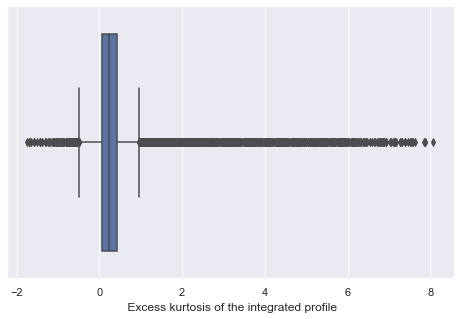

In [19]:
# for column in df.columns:
sns.set(rc = {'figure.figsize': (8, 5)})
sns.boxplot(x = df[' Excess kurtosis of the integrated profile'])
plt.show()

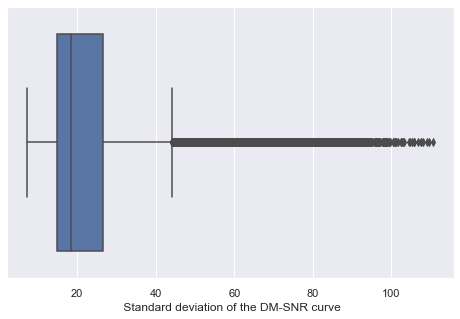

In [20]:
sns.set(rc = {'figure.figsize': (8, 5)})
sns.boxplot(x = df[' Standard deviation of the DM-SNR curve'])
plt.show()

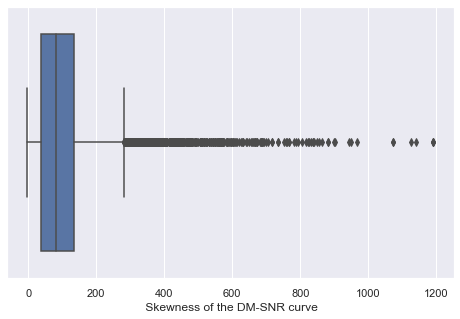

In [21]:
sns.set(rc = {'figure.figsize': (8, 5)})
sns.boxplot(x = df[' Skewness of the DM-SNR curve'])
plt.show()

In [22]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [23]:
for column in df.columns:
    df = df.rename(columns = {column: column.strip()})

In [24]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')